## Observations and Insights 

3 Observations:

1. The larger the mouse is, the larger the tumor size is expected to be
2. On average, mice taking Ramicane had tumor volumes the smallest at the final timepoint
3. The more then the average number of mice were tested on Ramicane and Ketapril     

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
print(study_df.shape)
study_df.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
print(study_df.columns)
study_df.describe()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Checking the number of mice.
miceCount=study_df["Mouse ID"].count()
miceCount

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

findUnique=study_df.groupby(["Mouse ID","Timepoint"]).size()
findUnique

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Length: 1888, dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newdf=study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

newdf.shape

(1888, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
miceCount2=newdf["Mouse ID"].count()
miceCount2

1888

## Summary Statistics

In [7]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [8]:
newdf.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [9]:
newdf.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [10]:
tMean=newdf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tMed=newdf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

tVar=newdf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

tSD=newdf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(np.std, ddof=0)
tSE=newdf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

tSE

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
summaryTable=pd.DataFrame()
summaryTable["Drug Regimen"]=newdf["Drug Regimen"].unique()
summaryTable["Avg Tumor Volume"]=np.array(tMean)
summaryTable["Median Tumor Volume"]=np.array(tMed)
summaryTable["Tumor Volume Variance"]=np.array(tVar)
summaryTable["Tumor Volume Standard Deviation"]=np.array(tSD)
summaryTable["Tumor Volume Standard Error"]=np.array(tSE)

summaryTable

,Drug Regimen,Avg Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
0,Ramicane,40.675741,41.557809,24.947764,4.983904,0.329346
1,Capomulin,52.591172,51.776157,39.290177,6.250556,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.548770,0.492236
3,Placebo,55.235638,53.698743,68.553577,8.257659,0.603860
4,Ceftamin,54.331565,52.509285,66.173479,8.112811,0.596466
5,Stelasyn,54.033581,52.288934,61.168083,7.799368,0.581331
6,Zoniferol,52.393463,50.909965,43.138803,6.546928,0.525862
7,Ketapril,40.216745,40.673236,23.486704,4.835669,0.320955
8,Propriva,54.233149,52.431737,59.450562,7.689090,0.573111
9,Naftisol,53.236507,51.818479,48.533355,6.947423,0.516398


## Bar and Pie Charts

In [12]:
miceDf=newdf.groupby(["Drug Regimen"])["Mouse ID"].count()

miceDf

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

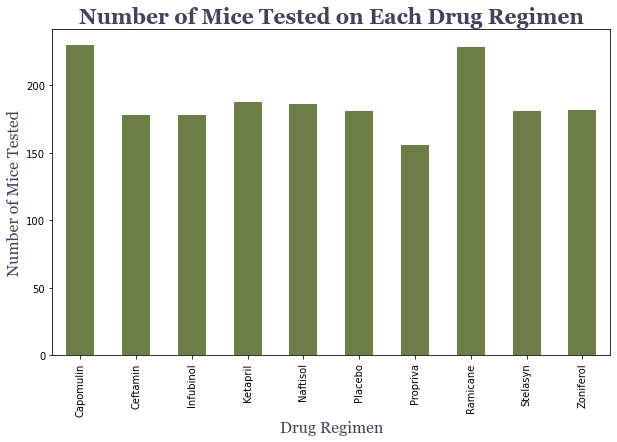

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.figure(figsize=(10,6))

miceDf.plot(kind="bar", color="#6C7D47")
plt.xlabel("Drug Regimen", color="#45425A",fontsize=16,fontname="Georgia")
plt.ylabel("Number of Mice Tested", color="#45425A", fontsize=16,fontname="Georgia")
plt.title("Number of Mice Tested on Each Drug Regimen", color="#45425A", fontsize=21,fontweight='bold',fontname="Georgia")

plt.show()

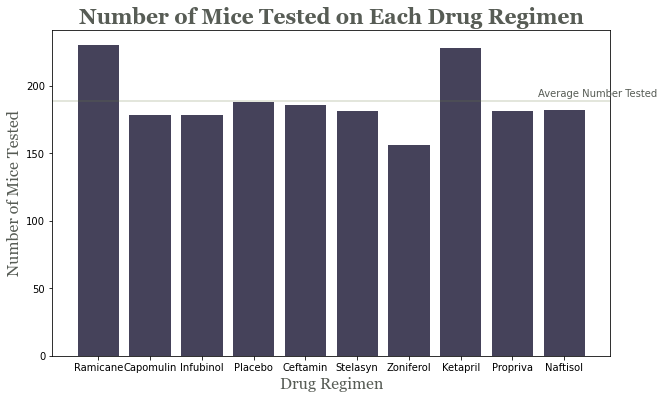

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(10,6))

x_axis=newdf["Drug Regimen"].unique()
totalNum=np.array(newdf.groupby(["Drug Regimen"])["Mouse ID"].count())

plt.bar(x_axis,totalNum, align="center",color="#45425A")
plt.xlabel("Drug Regimen", color="#575C55",fontsize=16,fontname="Georgia")
plt.ylabel("Number of Mice Tested", color="#575C55", fontsize=16,fontname="Georgia")
plt.title("Number of Mice Tested on Each Drug Regimen", color="#575C55", fontsize=21,fontweight='bold',fontname="Georgia")


plt.axhline(np.mean(totalNum),0,1,alpha=.25,color="#6C7D47")
plt.annotate( 'Average Number Tested', xy=(8.5, 192),color="#575C55")


plt.show()


In [15]:
gender=newdf.groupby("Sex")["Mouse ID"].count()

gender

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

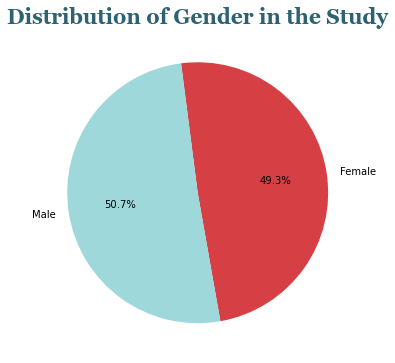

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,6))
colors="#D64045","#9ED8DB"
labels="Female","Male"

gender.plot(kind="pie",colors=colors, labels=labels,autopct="%1.1f%%",startangle=-80)
plt.ylabel("")
plt.title("Distribution of Gender in the Study",fontsize=21,fontweight='bold',fontname="Georgia",color="#2E6171")
plt.show()

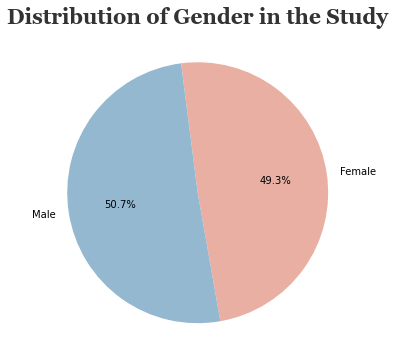

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,6))
colors="#E9AFA3","#95B8D1"
labels="Female","Male"

plt.pie(gender,colors=colors, labels=labels,autopct="%1.1f%%",startangle=-80)
plt.ylabel("")
plt.title("Distribution of Gender in the Study",fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.show()



## Quartiles, Outliers and Boxplots

In [18]:
drug_df=pd.DataFrame()

drug_df["Mouse ID"]=newdf["Mouse ID"]
drug_df["Timepoint"]=newdf["Timepoint"]

print(drug_df["Timepoint"].max())

drug_df.head()


45


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mask=drug_df["Timepoint"]==45

fin_df=drug_df.loc[mask]

fin_df=fin_df.reset_index(drop=True)

fin_df.head()

,Mouse ID,Timepoint
0,k403,45
1,s185,45
2,x401,45
3,m601,45
4,g791,45


In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimen_df = pd.merge(newdf,fin_df, on=["Mouse ID", "Timepoint"],how="outer")

wantedDrugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

regimen_df2=regimen_df.loc[regimen_df["Drug Regimen"].isin(wantedDrugs)]


print(regimen_df2["Drug Regimen"].unique())
regimen_df2.head()


['Ramicane' 'Capomulin' 'Infubinol' 'Ceftamin']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]    
tumorDataList=[]

#Booth help

for drug in drugs:
  
    found=regimen_df2.loc[regimen_df2["Drug Regimen"]==drug, "Tumor Volume (mm3)"]


    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(drug)

    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()
    
    tumorDataList.append(found.values)

Capomulin
The lower quartile of Tumor Volume is: 37.685932865
The upper quartile of Tumor Volume is: 45.0
The interquartile range of Tumor Volume is: 7.314067135000002
The the median of Tumor Volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.

Ramicane
The lower quartile of Tumor Volume is: 36.67463458499999
The upper quartile of Tumor Volume is: 45.0
The interquartile range of Tumor Volume is: 8.325365415000007
The the median of Tumor Volume is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.

Infubinol
The lower quartile of Tumor Volume is: 47.3123533
The upper quartile of Tumor Volume is: 57.314443967500004
The interquartile range of Tumor Volume is: 10.002090667500006
The the median of Tumor Volume is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.

Ceftamin
The lower quartile

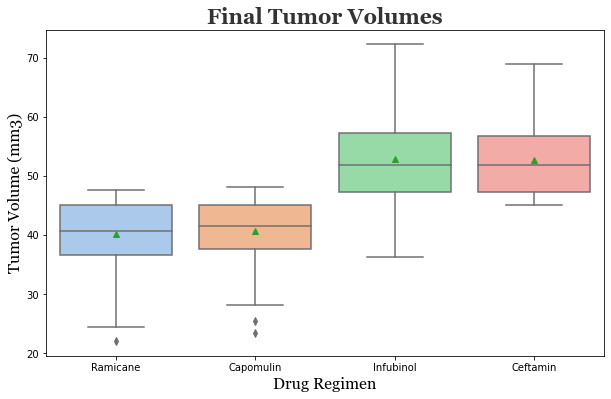

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=regimen_df2, palette=sns.color_palette("pastel"),showmeans=True)

plt.title("Final Tumor Volumes", fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.xlabel("Drug Regimen", fontsize=16,fontname="Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize=16,fontname="Georgia")


plt.show()


## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousefind=regimen_df2.loc[regimen_df2["Drug Regimen"]=="Capomulin"]

mousex=mousefind.iloc[1]

print(mousex)

mousex_df=regimen_df2.loc[regimen_df2["Mouse ID"]=="s185"]

mousex_df.head()

Mouse ID                   s185
Drug Regimen          Capomulin
Sex                      Female
Age_months                    3
Weight (g)                   17
Timepoint                     5
Tumor Volume (mm3)      43.8785
Metastatic Sites              0
Name: 11, dtype: object


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


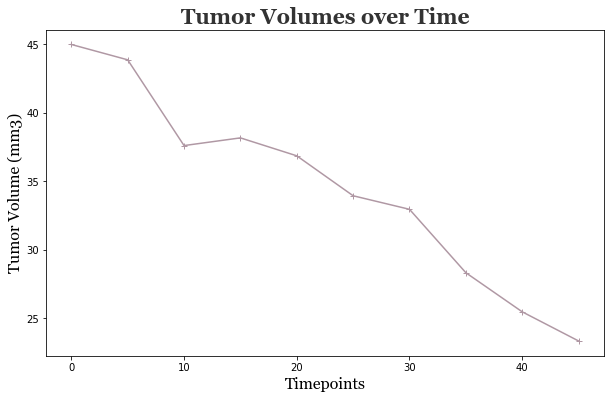

In [24]:
plt.figure(figsize=(10,6))

xaxis=mousex_df["Timepoint"]
yaxis=mousex_df["Tumor Volume (mm3)"]

plt.plot(xaxis,yaxis, color="#B098A4",marker="+")

plt.title("Tumor Volumes over Time", fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.xlabel("Timepoints", fontsize=16,fontname="Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize=16,fontname="Georgia")

plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regime
drug=["Capomulin"]

regimen_df3=regimen_df2.loc[regimen_df2["Drug Regimen"].isin(drug)].reset_index(drop=True)


tumorWeights=regimen_df3.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()
tumorWeights

<ipython-input-25-4d41807ee6f7>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tumorWeights=regimen_df3.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


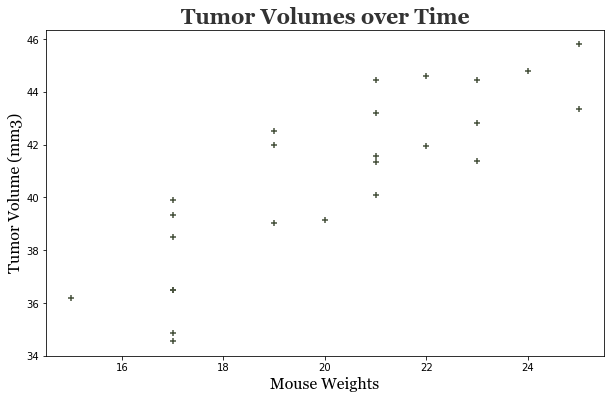

In [26]:
plt.figure(figsize=(10,6))

plt.scatter(tumorWeights["Weight (g)"], tumorWeights["Tumor Volume (mm3)"], color="#45503B",marker="+")

plt.title("Tumor Volumes over Time", fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.xlabel("Mouse Weights", fontsize=16,fontname="Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize=16,fontname="Georgia")

plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

tumorWeights.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [28]:
target= tumorWeights["Tumor Volume (mm3)"]
featureWeight=tumorWeights["Weight (g)"]

sts.pearsonr(featureWeight, target)

(0.8419363424694717, 1.322572243471279e-07)

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(featureWeight, target)
regress_values = featureWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


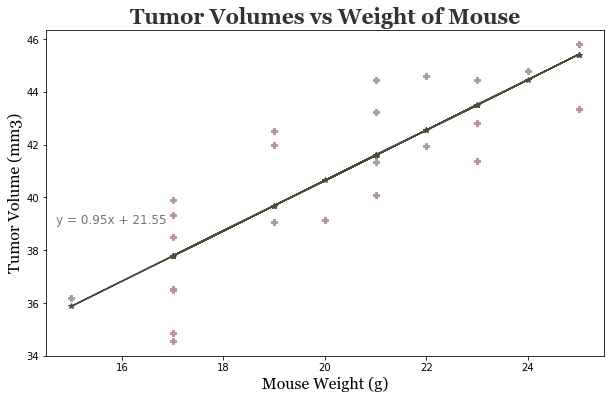

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(featureWeight,target, color="#B098A4",marker="P")
plt.plot(featureWeight,regress_values,"r-",color="#45503B",marker="*")

plt.title("Tumor Volumes vs Weight of Mouse", fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.xlabel("Mouse Weight (g)", fontsize=16,fontname="Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize=16,fontname="Georgia")

plt.annotate(line_eq,(14.7,39),fontsize=12,color="#747572")
plt.show()